In [111]:
# Manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV


# Setting Configs
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('fivethirtyeight')


## Attribute Information

- Age (age in years)
- Sex (1 = male; 0 = female)
- CP (chest pain type)
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
- CHOL (serum cholestoral in mg/dl)
- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina (1 = yes; 0 = no))
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by flourosopy)
- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
- TARGET (1 or 0)

In [2]:
# Loading Dataset
heart = pd.read_csv('./datasets/heart.csv')

# Inspecting Dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900,1,3,2,0


In [3]:
# Dataset info
print('#' * 50)
print('Total Rows:', heart.shape[0])
print('Total Columns:', heart.shape[1])
print('#' * 50, '\n')
heart.info(memory_usage=False)
print('\n')
print('#' * 50)

##################################################
Total Rows: 1025
Total Columns: 14
################################################## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)

##################################################


In [4]:
print('#' * 35)
print('Fixing Data Type')
print('#' * 35)
fix_dtype          = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
heart[fix_dtype]   = heart[fix_dtype].astype(object)
print(heart[fix_dtype].dtypes)
print('#' * 35)

###################################
Fixing Data Type
###################################
sex        object
cp         object
fbs        object
restecg    object
exang      object
slope      object
ca         object
thal       object
dtype: object
###################################


In [5]:
# Dataset info
print('#' * 35)
print('Checking NULL Values ')
print('#' * 35)
print(heart.isna().sum())
print('#' * 35,)

###################################
Checking NULL Values 
###################################
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
###################################


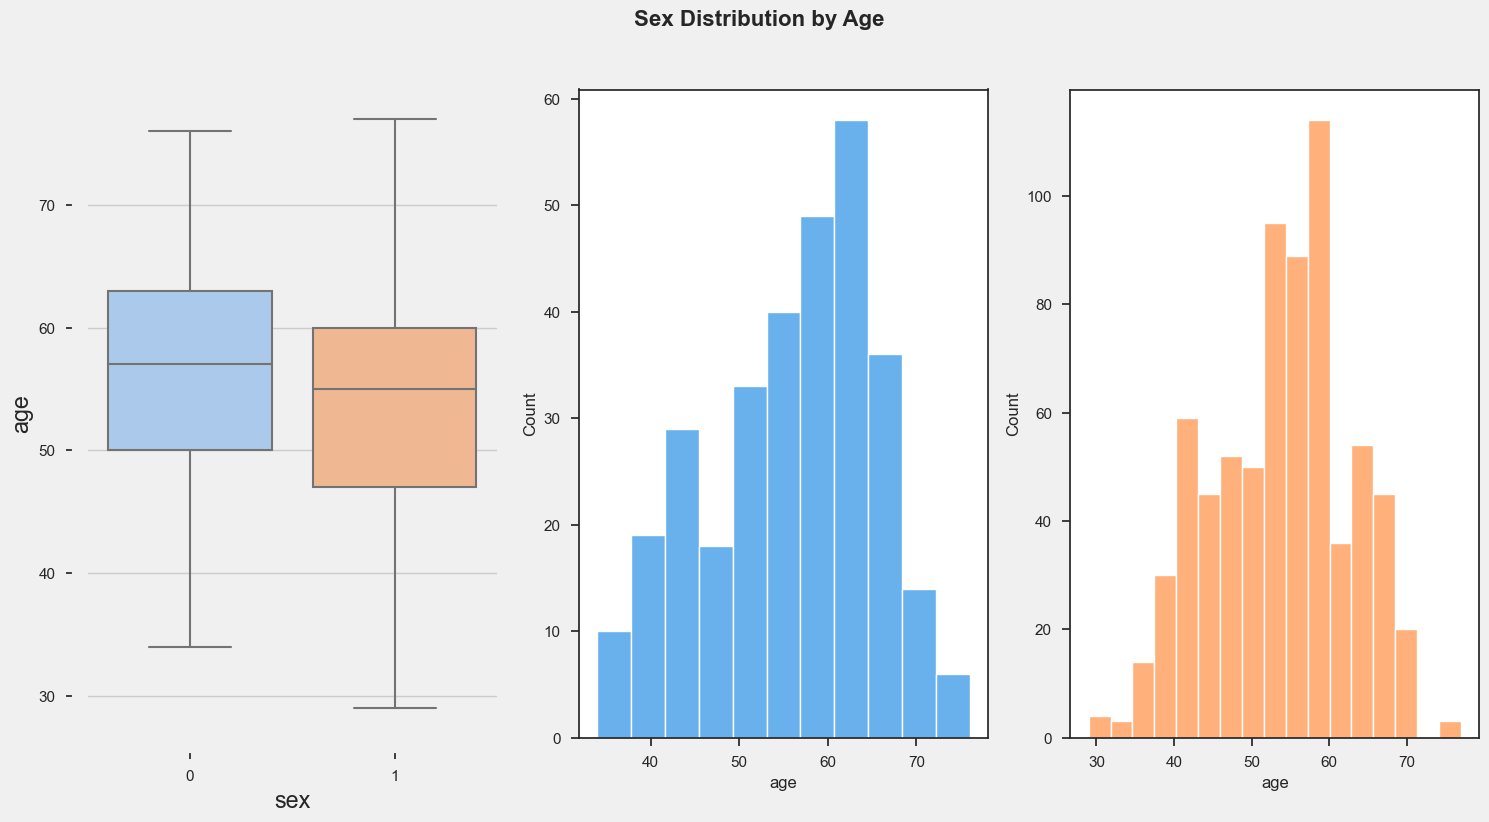

In [112]:
plt.figure(figsize=(16, 8))
plt.suptitle('Sex Distribution by Age', 
             fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif'
            )
glabel = ['Female', 'Male']
# --- Boxplot
plt.subplot(1, 3, 1)
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='sex', y='age',data=heart, dodge=False)
sns.despine(offset=10, trim=True)

plt.subplot(1, 3, 2)
sns.histplot(data=heart[heart.sex == 0], x=heart.age[heart.sex == 0], color='#3597e8',label ='Female')

plt.subplot(1, 3, 3)
sns.histplot(data=heart[heart.sex == 1], x=heart.age[heart.sex == 1], color='#ff964f', label='Male')

plt.show()

In [7]:
#Descriptive Statistics
print('#' * 64)
print('Descriptive Statistics')
print('#' * 64)
heart.select_dtypes(exclude='object').describe()

################################################################
Descriptive Statistics
################################################################


,age,trestbps,chol,thalach,oldpeak,target
count,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000
mean,54.434,131.612,246.000,149.114,1.072,0.513
std,9.072,17.517,51.593,23.006,1.175,0.500
min,29.000,94.000,126.000,71.000,0.000,0.000
25%,48.000,120.000,211.000,132.000,0.000,0.000
50%,56.000,130.000,240.000,152.000,0.800,1.000
75%,61.000,140.000,275.000,166.000,1.800,1.000
max,77.000,200.000,564.000,202.000,6.200,1.000


# We need to add more EDA before starting to applying ML Models

# ML part

In [26]:
# One-Hot Enconding

df = pd.get_dummies(heart, columns=['cp', 'thal', 'slope'], drop_first=True)

# Inspecting new dataset
df.head()

/Users/sandokhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.000,2,0,0,0,0,0,0,1,0,1
1,53,1,140,203,1,0,155,1,3.100,0,0,0,0,0,0,0,1,0,0
2,70,1,145,174,0,1,125,1,2.600,0,0,0,0,0,0,0,1,0,0
3,61,1,148,203,0,1,161,0,0.000,1,0,0,0,0,0,0,1,0,1
4,62,0,138,294,1,1,106,0,1.900,3,0,0,0,0,0,1,0,1,0


In [78]:
# Divide dataset in 2: Dependent (Target) variable and Independent Variables
X = df.loc[:, df.columns != 'target'].values

y = df.target.values

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1984)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [48]:
print(X.shape, y.shape)

(1025, 18) (1025,)


# Lasso

In [52]:
# Create pipeline steps
steps = [#("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.24486224067977735


# Logistic Regression

In [50]:
# Build the steps
steps = [('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]
         
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.8402439024390244 
 {'logreg__C': 0.05357894736842105}


# KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[88 13]
 [39 65]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       101
           1       0.83      0.62      0.71       104

    accuracy                           0.75       205
   macro avg       0.76      0.75      0.74       205
weighted avg       0.76      0.75      0.74       205



In [51]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[99  2]
 [ 8 96]]


In [87]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9951219512195122, 3: 0.9939024390243902, 4: 0.9341463414634147, 5: 0.901219512195122, 6: 0.8256097560975609, 7: 0.7865853658536586, 8: 0.7646341463414634, 9: 0.7439024390243902, 10: 0.7707317073170732, 11: 0.7682926829268293, 12: 0.7707317073170732} 
 {1: 1.0, 2: 0.9609756097560975, 3: 0.9512195121951219, 4: 0.8146341463414634, 5: 0.7219512195121951, 6: 0.7463414634146341, 7: 0.7365853658536585, 8: 0.7024390243902439, 9: 0.7414634146341463, 10: 0.7609756097560976, 11: 0.7365853658536585, 12: 0.7560975609756098}


# Linear Regression

In [59]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [-0.04074403  1.04193347], Actual Values: [0 1]


In [60]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.5720787677812028
RMSE: 0.3270434181271705


In [61]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg ,X, y, cv=kf)

# Print scores
print(cv_scores)

[0.55936132 0.500261   0.59692181 0.55363642 0.58820221 0.32201082]


In [63]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.5200655948968341
0.09384255205956818
[0.34429209 0.59583186]


In [70]:
# Calculate roc_auc_score
#print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

[[88 13]
 [39 65]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       101
           1       0.83      0.62      0.71       104

    accuracy                           0.75       205
   macro avg       0.76      0.75      0.74       205
weighted avg       0.76      0.75      0.74       205




# Ridge

In [64]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.5721507702246038, 0.5724756712413214, 0.5714290597561047, 0.5508868097278812, 0.44355031601523853, 0.29204853673229836]


In [75]:
# Instantiate a ridge model
ridge = Ridge(alpha=.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 0.34410609056936137
Standard Deviation of the target array: 0.4998265017246424


# Lasso

In [71]:
# Set up the parameter grid
param_grid = {"alpha": np.linspace(.00001, 1, 20)}

lasso = Lasso()

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.5066181766609161


# KNN Final

# Decision Tree

# Linear Regression

# Messing around

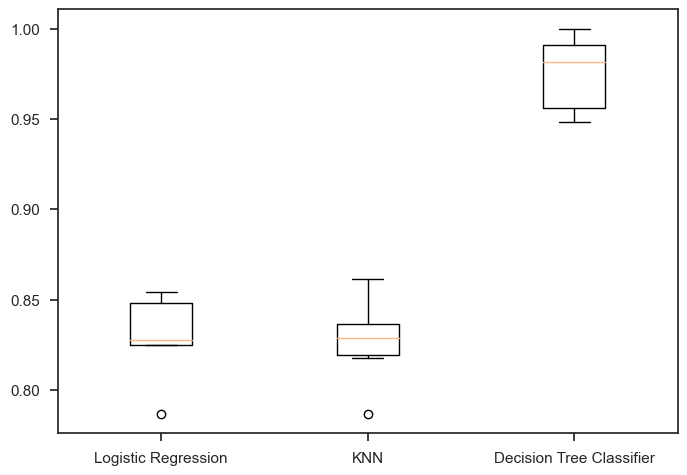

In [100]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=1984, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [108]:
# Test set perfomance

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {:.2f}% ".format(name, test_score * 100))

Logistic Regression Test Set Accuracy: 88.29% 
KNN Test Set Accuracy: 87.32% 
Decision Tree Classifier Test Set Accuracy: 100.00% 


In [102]:
for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled,y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Logistic Regression Test Set RMSE: 0.34215956910732065
KNN Test Set RMSE: 0.356130970701346
Decision Tree Classifier Test Set RMSE: 0.0


In [104]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train_scaled, y_train)
y_pred = tuning.predict(X_test_scaled)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.223, 'logreg__solver': 'newton-cg'}, Accuracy: 0.5024390243902439


In [105]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0])